# K-means Clustering

### Import resources and display image

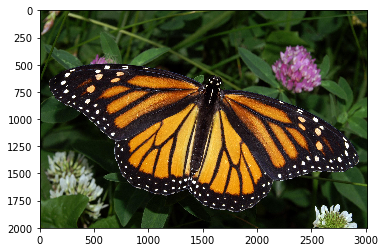

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
## TODO: Check out the images directory to see other images you can work with
# And select one!
image = cv2.imread('images/monarch.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Prepare data for k-means

In [2]:
# Reshape image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)

### Implement k-means clustering

[[ 62  74  38]
 [ 20  24  12]
 [204 153  80]]
<class 'numpy.ndarray'>
(6016000, 1)
(6016000,)
(6016000, 3)
(2000, 3008, 3)
(2000, 3008)


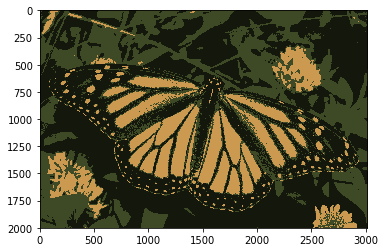

In [11]:
# define stopping criteria
# you can change the number of max iterations for faster convergence!
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

## TODO: Select a value for k
# then perform k-means clustering - this maps all colors to just k colors
k = 3
retval, labels, rgbcenters = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
rgbcenters = np.uint8(rgbcenters)
print(rgbcenters)
segmented_data = rgbcenters[labels.flatten()]
print(type(labels))
print(labels.shape)
print(labels.flatten().shape)
print(segmented_data.shape)

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
print(segmented_image.shape)
labels_reshape = labels.reshape(image.shape[0], image.shape[1])
print(labels_reshape.shape)

plt.imshow(segmented_image)

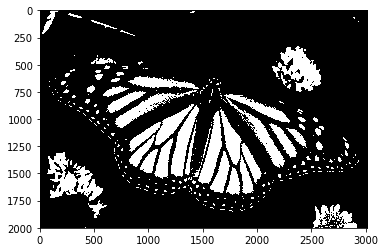

In [8]:
## TODO: Visualize one segment, try to find which is the leaves, background, etc!
plt.imshow(labels_reshape==0, cmap='gray')

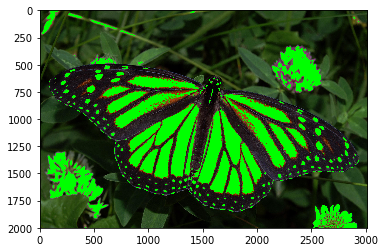

In [9]:
# mask an image segment by cluster

cluster = 0 # the first cluster

masked_image = np.copy(image)
# turn the mask green!
masked_image[labels_reshape == cluster] = [0, 255, 0]

plt.imshow(masked_image)